# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [88]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [89]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [90]:
# TODO
# Insert your code HERE
data = [[850, 150], [900, 150]]
df = pd.DataFrame(data, columns=["No Clicks", "Clicks"],  index=["Version A", "Version B"])
print(df)

           No Clicks  Clicks
Version A        850     150
Version B        900     150


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [91]:
# Null Hypothesis (H₀): There is no statistically significant difference between both Versions `.
# Alternative Hypothesis `Version A differs from Version B in a statistically significant way`.



- Run the Test

In [92]:
# TODO
# Insert your code HERE
alpha = 0.05

chi2, p_value, dof, expected = stats.chi2_contingency(df)
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.1559138888888883
Degrees of freedom: 1
P-value: 0.6929467076002227
Expected frequencies:
 [[853.65853659 146.34146341]
 [896.34146341 153.65853659]]


> Interpret Results

In [93]:
# TODO
# Insert your code HERE
if p_value < alpha:
    print("There is a statistically significant difference between version A and Version B")
    print(f"p = {p_value:.4f} < {alpha}, so reject H₀: significant difference.")
else:
     print("There is NO statistically significant difference between version A and Version B")
     print(f"p = {p_value:.4f} ≥ {alpha}, so fail to reject H₀: no significant difference.")

There is NO statistically significant difference between version A and Version B
p = 0.6929 ≥ 0.05, so fail to reject H₀: no significant difference.


📈 Visualization

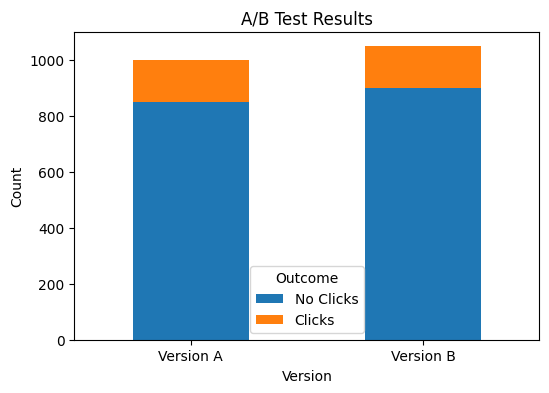

In [94]:
# TODO
# Insert your code HERE
# Plot
ax = df.plot(kind="bar", stacked=True, figsize=(6,4))

plt.title("A/B Test Results")
plt.xlabel("Version")
plt.ylabel("Count")
plt.legend(title="Outcome")
plt.xticks(rotation=0)
plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [95]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [96]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [97]:
# TODO
# Insert your code HERE
contingency = pd.crosstab(data["test group"], data["converted"])
print(contingency)

converted    False  True 
test group               
ad          550154  14423
psa          23104    420


> Statistical Test

In [98]:
# TODO
# Insert your code HERE

chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)
print("Expected frequencies:\n", expected)

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between version A and Version B")
    print(f"p = {p_value:.4f} < {alpha}, so reject H₀: significant difference.")
else:
     print("There is NO statistically significant difference between version A and Version B")
     print(f"p = {p_value:.4f} ≥ {alpha}, so fail to reject H₀: no significant difference.")

Chi-square statistic: 54.005823883685245
Degrees of freedom: 1
P-value: 1.9989623063390075e-13
Expected frequencies:
 [[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]]
There is a statistically significant difference between version A and Version B
p = 0.0000 < 0.05, so reject H₀: significant difference.


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [99]:
# TODO

# Parameters
n_iterations = 200  # number of bootstrap samples
sample_size = len(data) 

boot_diffs = []  # store differences in conversion rate

for i in range(n_iterations):
    # Sample with replacement from each group
    sample_ad = data[data["test group"]=="ad"]["converted"].sample(
        n=sample_size, replace=True
    )
    sample_psa = data[data["test group"]=="psa"]["converted"].sample(
        n=sample_size, replace=True
    )

    # Compute conversion rates
    cr_ad = sample_ad.mean()
    cr_psa = sample_psa.mean()

    # Store the difference (ad - psa)
    boot_diffs.append(cr_ad - cr_psa)

# Convert to numpy array
boot_diffs = np.array(boot_diffs)

# Point estimate
diff_mean = boot_diffs.mean()

# 95% confidence interval
ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])

print("Estimated difference in conversion rates:", diff_mean)
print("95% CI:", (ci_lower, ci_upper))


Estimated difference in conversion rates: 0.007677048670211409
95% CI: (np.float64(0.0071636504614003395), np.float64(0.008236212827388494))


>Visualize Resultsm

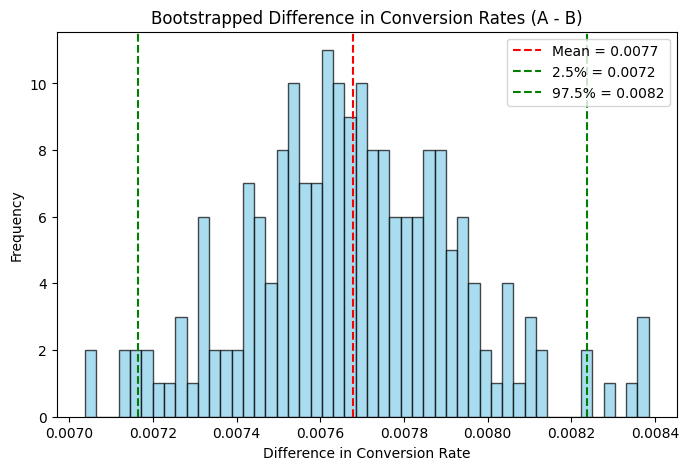

In [100]:

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(boot_diffs, bins=50, color='skyblue', edgecolor='k', alpha=0.7)

# Plot mean line
mean_diff = boot_diffs.mean()
plt.axvline(mean_diff, color='red', linestyle='--', label=f"Mean = {mean_diff:.4f}")

# Plot 95% confidence interval
ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])
plt.axvline(ci_lower, color='green', linestyle='--', label=f"2.5% = {ci_lower:.4f}")
plt.axvline(ci_upper, color='green', linestyle='--', label=f"97.5% = {ci_upper:.4f}")

plt.title("Bootstrapped Difference in Conversion Rates (A - B)")
plt.xlabel("Difference in Conversion Rate")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [101]:
# Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [109]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7
data.head()
len(data)

90189

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [103]:
# TODO
# Insert your code HERE
contingency = pd.crosstab(data["version"], data["retention_1"])
print(contingency)

retention_1  False  True 
version                  
gate_30      24666  20034
gate_40      25370  20119


> Statistical Test

In [104]:
# TODO
# Insert your code HERE
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)
print("Expected frequencies:\n", expected)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between version A and Version B")
    print(f"p = {p_value:.4f} < {alpha}, so reject H₀: significant difference.")
else:
     print("There is NO statistically significant difference between version A and Version B")
     print(f"p = {p_value:.4f} ≥ {alpha}, so fail to reject H₀: no significant difference.")

Chi-square statistic: 3.1591007878782262
Degrees of freedom: 1
P-value: 0.07550476210309086
Expected frequencies:
 [[24799.13514952 19900.86485048]
 [25236.86485048 20252.13514952]]
There is NO statistically significant difference between version A and Version B
p = 0.0755 ≥ 0.05, so fail to reject H₀: no significant difference.


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [ ]:
# TODO
# Insert your code HERE

# Split into chunks of 500 rows
chunks = [data.iloc[i:i+500] for i in range(0, len(data), 500)]

for chunk in chunks:    
    print("----------------- next chunk ---------------------------")
    contingency = pd.crosstab(chunk["version"], chunk["retention_1"])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

    print("Chi-square statistic:", chi2)   
    print("P-value:", p_value)
    
    alpha = 0.05
    if p_value < alpha:
        print("There is a statistically significant difference between version A and Version B")
        print(f"p = {p_value:.4f} < {alpha}, so reject H₀: significant difference.")
    else:
        print("There is NO statistically significant difference between version A and Version B")
        print(f"p = {p_value:.4f} ≥ {alpha}, so fail to reject H₀: no significant difference.")


----------------- next chunk ---------------------------
Chi-square statistic: 0.12309915613488395
Degrees of freedom: 1
P-value: 0.7256972128038405
Expected frequencies:
 [[143.448 114.552]
 [134.552 107.448]]
There is NO statistically significant difference between version A and Version B
p = 0.7257 ≥ 0.05, so fail to reject H₀: no significant difference.
----------------- next chunk ---------------------------
Chi-square statistic: 1.0805500797309602
Degrees of freedom: 1
P-value: 0.29857453200712974
Expected frequencies:
 [[152.152  94.848]
 [155.848  97.152]]
There is NO statistically significant difference between version A and Version B
p = 0.2986 ≥ 0.05, so fail to reject H₀: no significant difference.
----------------- next chunk ---------------------------
Chi-square statistic: 0.32837196088704446
Degrees of freedom: 1
P-value: 0.5666193126655912
Expected frequencies:
 [[138.32 108.68]
 [141.68 111.32]]
There is NO statistically significant difference between version A and Ve

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [115]:
# TODO
# Insert your code HERE

import math
from scipy.stats import norm

# Parameters
p1 = 0.20
p2 = 0.22
alpha = 0.05
power = 0.8

# Z-scores
z_alpha = norm.ppf(1 - alpha/2)
z_beta = norm.ppf(power)

# Pooled proportion
p_bar = (p1 + p2) / 2

# Sample size per group
n = ((z_alpha * math.sqrt(2 * p_bar * (1 - p_bar)) + z_beta * math.sqrt(p1*(1-p1) + p2*(1-p2)))**2) / (p2 - p1)**2

print("Required sample size per group:", math.ceil(n))

Required sample size per group: 6510


Enjoy & Happy A/B Testing :) ......!